<a href="https://colab.research.google.com/github/venidaydream/Intro_to_Big_Data/blob/main/Taller2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio

Usando el fichero Simul.xls de clase realiza la metodología Box-Jenkins para las series Y2, Y3, Y4, Y5, Y8

In [183]:
# importando la api de statsmodels
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
import pandas as pd

In [184]:
df=pd.read_csv('Simul.csv')
print(df[:3])

          Y        Y1        Y2        Y3         Y4        Y5        Y6  \
0  2.298704 -2.882500  6.560133 -3.342531 -18.681190  1.566716  2.839575   
1  6.371003 -2.329862  6.149235 -3.827409 -14.458870  1.232620  0.560095   
2  8.664033 -0.558244  7.563736  0.667583  -5.830734  0.902619  2.357468   

         Y7        Y8        Y9  
0  42.71518  0.472623 -3.284886  
1  43.38689  1.796142 -2.929823  
2  42.38133  1.937842 -3.015838  


# df.Y

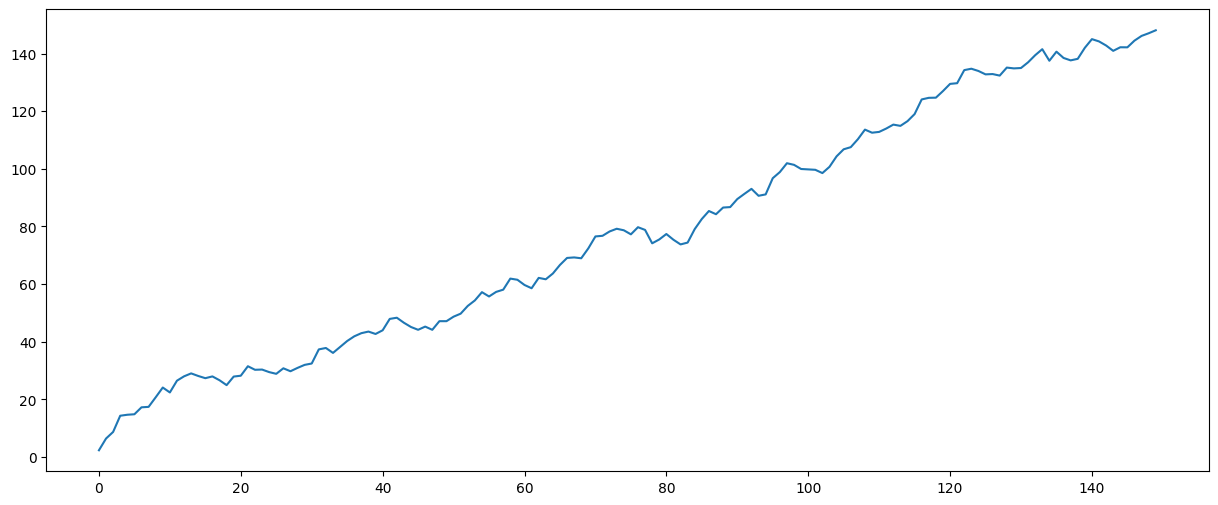

In [185]:
# utilizando la api de formula de statsmodels
plt.figure(figsize=(15,6))
plt.plot(df.Y)
plt.show()

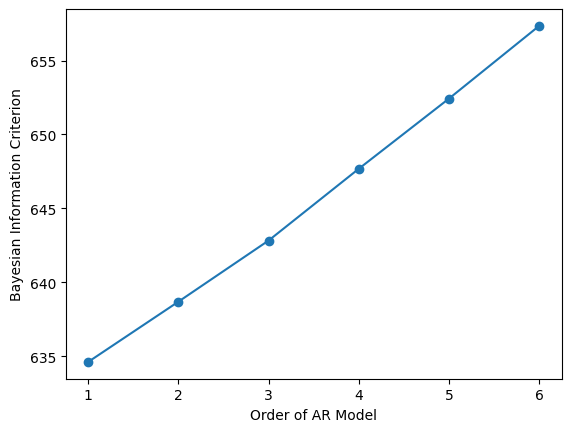

In [186]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(df.Y.diff(), order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [187]:
import itertools
p=d=q=range(0,2)
pdq=list(itertools.product(p,d,q))

for param in pdq:
  try:
    model_arima=sm.tsa.arima.ARIMA(df.Y,order=param)
    model_arima_fit=model_arima.fit()
    print(param,model_arima_fit.bic)
  except:
    continue

(0, 0, 0) 1555.8973909678364
(0, 0, 1) 1369.0848747463642
(0, 1, 0) 658.8374361218621


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 1, 1) 656.3857400305664
(1, 0, 0) 680.2258385844714
(1, 0, 1) 677.7735038111322
(1, 1, 0) 654.9233464822144
(1, 1, 1) 639.6521741346843


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


**dickey-fuller**

p-value > 0,05 => we cannot reject the H0 that the series is a random walk (aka it's a random walk, non-stationary)

In [188]:
# dickey-fuller
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -0.713221
p-value:0.843295


ACF = autocorrelation

PCF = partial autocorrelation -> indirect correlations are removed


The Partial Autocorrelation Function measures the incremental benefit of adding another lag.

The ACF plots the correlation between the data and its lagged values, while the PACF plots the correlation between the data and its lagged values after removing the effect of the intermediate values.


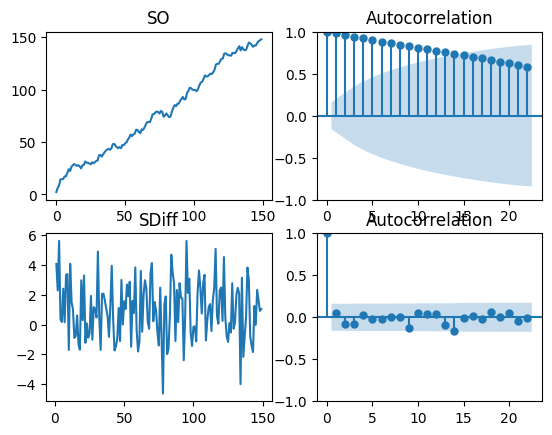

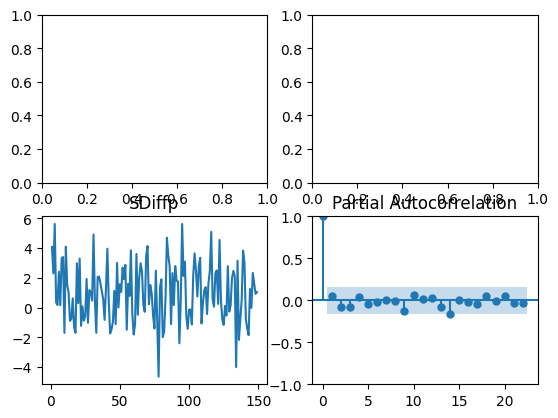

In [189]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y); axes[0,0].set_title('SO')

plot_acf(df.Y, ax=axes[0,1])

axes[1,0].plot(df.Y.diff()); axes[1,0].set_title('SDiff')

plot_acf(df.Y.diff().dropna(), ax=axes[1,1])

plt.show()

fig, axes=plt.subplots(2,2, sharex=False)

axes[1,0].plot(df.Y.diff()); axes[1,0].set_title('SDiffp')

#partial autocorrelation
plot_pacf(df.Y.diff().dropna(), ax=axes[1,1])

plt.show()

In [190]:
#nuevo df
result=adfuller(df.Y.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -11.570800
p-value:0.000000


For ARIMA model, order=(p,d,q)

p - how many lag values

d - how many differences

q - MA part


(1,0,0) -> AR(1) model

(2,0,0) -> AR(2) model

In [191]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y, order=(0, 1, 0))
resultados = modelo_y.fit() #estimate the model
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                      Y   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -326.917
Date:                Mon, 20 Nov 2023   AIC                            655.833
Time:                        22:04:16   BIC                            658.837
Sample:                             0   HQIC                           657.054
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.7128      0.579      8.140      0.000       3.578       5.848
Ljung-Box (L1) (Q):                   0.41   Jarque-Bera (JB):                 0.66
Prob(Q):                              0.52   Pr

In [192]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,5.128146,0.882455


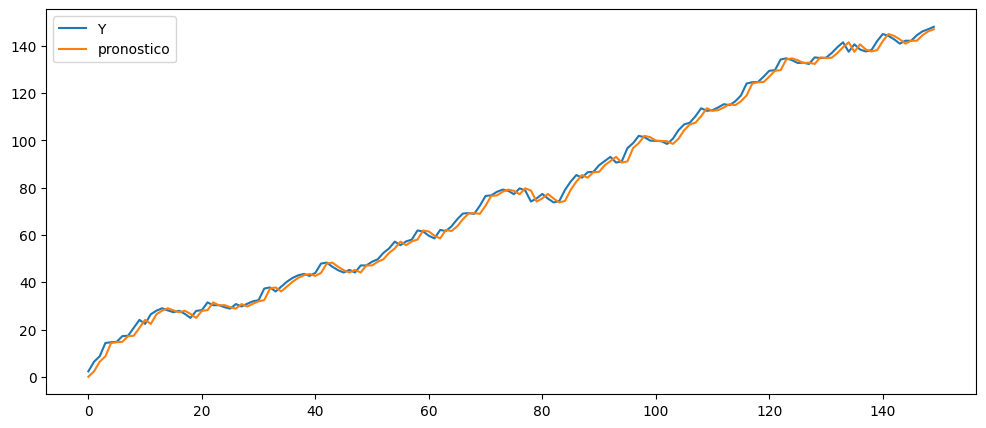

In [193]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y2 - exam


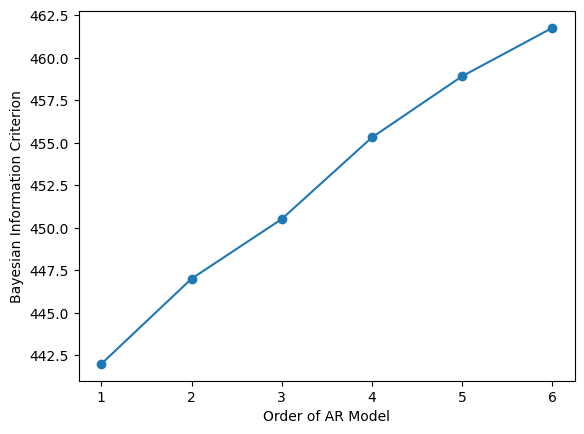

In [194]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(df.Y2.diff(), order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [195]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y2.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -1.150434
p-value:0.694546


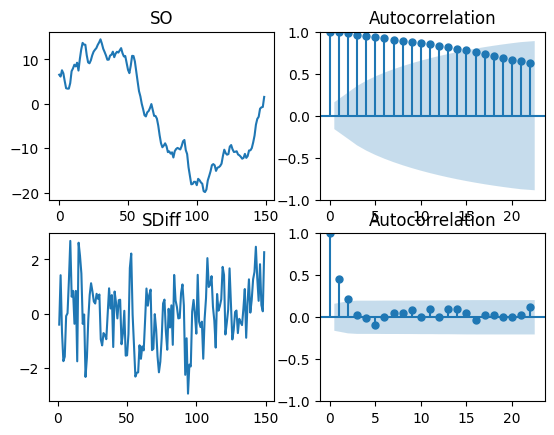

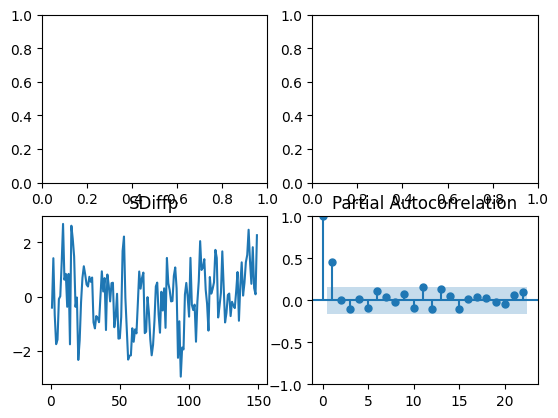

In [196]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y2); axes[0,0].set_title('SO')
plot_acf(df.Y2, ax=axes[0,1])
axes[1,0].plot(df.Y2.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y2.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y2.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y2.diff().dropna(), ax=axes[1,1])
plt.show()

In [197]:
#nuevo df
result=adfuller(df.Y2.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.101717
p-value:0.000000


In [198]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y2, order=(1, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y2   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -213.489
Date:                Mon, 20 Nov 2023   AIC                            430.978
Time:                        22:04:19   BIC                            436.986
Sample:                             0   HQIC                           433.419
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4707      0.079      5.987      0.000       0.317       0.625
sigma2         1.0264      0.115      8.914      0.000       0.801       1.252
Ljung-Box (L1) (Q):                   0.00   Jarque-

In [199]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,12.577929,0.248237


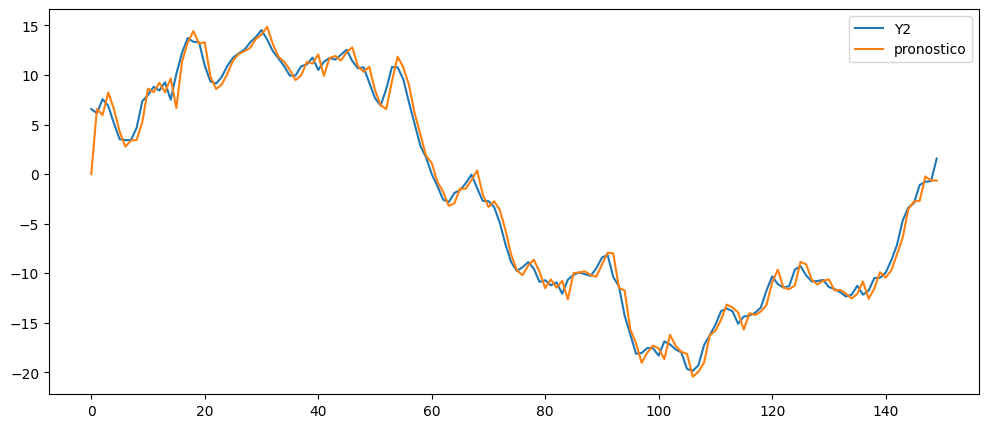

In [200]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y2', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y3 - exam

In [201]:
# Loop over p values from 0-3
for p in range(4):

  # Loop over q values from 0-3
    for q in range(4):
      try:
        # Create and fit ARMA(p,q) model
        model = ARIMA(df.Y3, order=(p,0,q))
        results = model.fit()

        # Print p, q, AIC, BIC
        print(p, q, results.aic, results.bic)

      except:
        print(p, q, None, None)

0 0 818.7768048130085 824.798075401201
0 1 778.4640993008315 787.4960051831204
0 2 779.973657105704 792.016198282089
0 3 781.3347041830757 796.387880653557
1 0 796.4021799025284 805.4340857848172
1 1 780.0623478386082 792.1048890149932
1 2 781.6363552996942 796.6895317701754
1 3 783.6332393207103 801.6970510852879
2 0 787.1177311458137 799.1602723221987
2 1 781.3461894960667 796.399365966548
2 2 782.4758842436598 800.5396960082373


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2 3 784.5400732606633 805.6145203193371
3 0 783.0967099462296 798.1498864167108
3 1 782.6212118639123 800.6850236284898
3 2 783.8932857608438 804.9677328195176
3 3 785.0412147953759 809.126297148146


In [202]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y3.diff().dropna())
print ('ADF Statistic: %f' % result[0]) #more negative means more likely to be stationary. Looking more negative test statistic
print('p-value:%f' % result[1]) #if p-value is small -> reject Ho. Reject non-stationary. Therefore it is stationary

ADF Statistic: -7.008849
p-value:0.000000


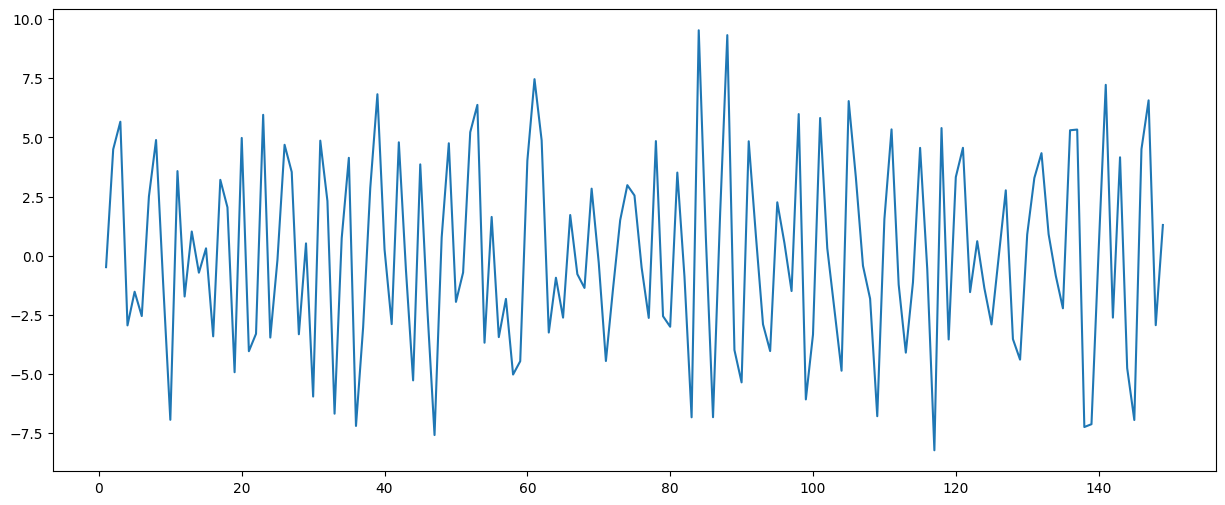

In [203]:
# utilizando la api de formula de statsmodels
plt.figure(figsize=(15,6))
plt.plot(df.Y3.diff())
plt.show()

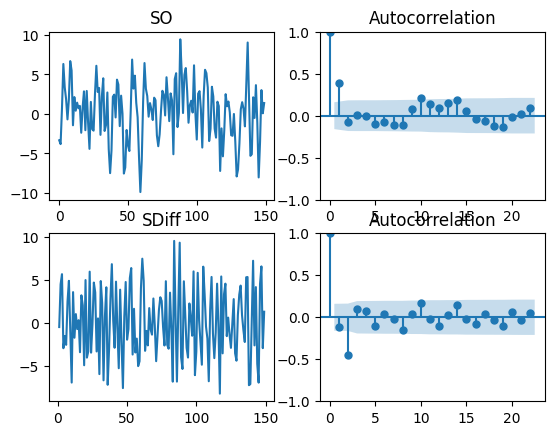

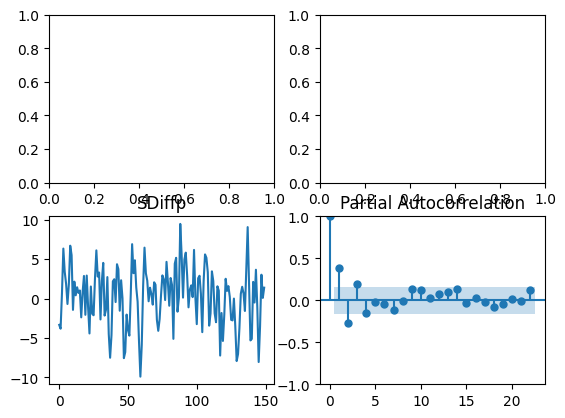

In [204]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y3); axes[0,0].set_title('SO')
plot_acf(df.Y3, ax=axes[0,1])
axes[1,0].plot(df.Y3.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y3.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y3); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y3.dropna(), ax=axes[1,1])
plt.show()

In [231]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y3, order=(0, 1, 0)) # 841.691
resultados = modelo_y.fit()
print (resultados.summary()) #sigma2 variance of the shock terms

                               SARIMAX Results                                
Dep. Variable:                     Y3   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -419.907
Date:                Mon, 20 Nov 2023   AIC                            841.814
Time:                        22:10:32   BIC                            844.817
Sample:                             0   HQIC                           843.034
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        16.4193      2.488      6.600      0.000      11.544      21.295
Ljung-Box (L1) (Q):                   2.16   Jarque-Bera (JB):                 4.40
Prob(Q):                              0.14   Pr

In [232]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,47.96168,6.307493e-07


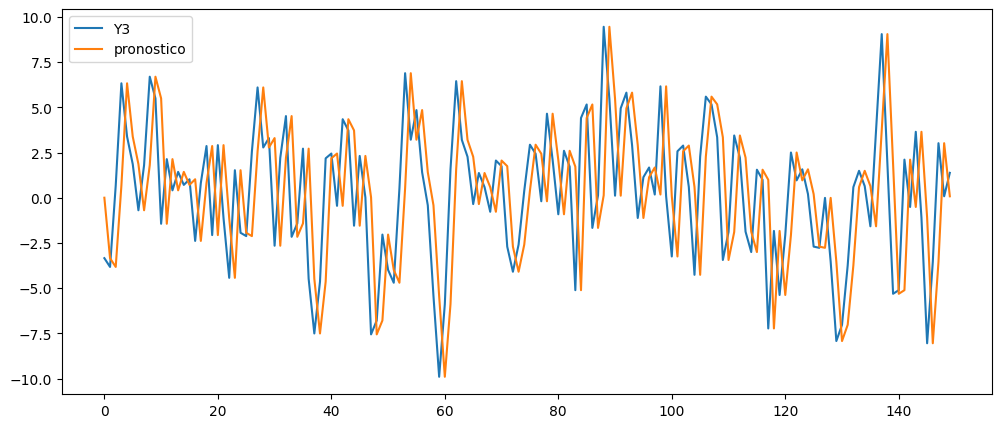

In [233]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y3', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y4 - exam

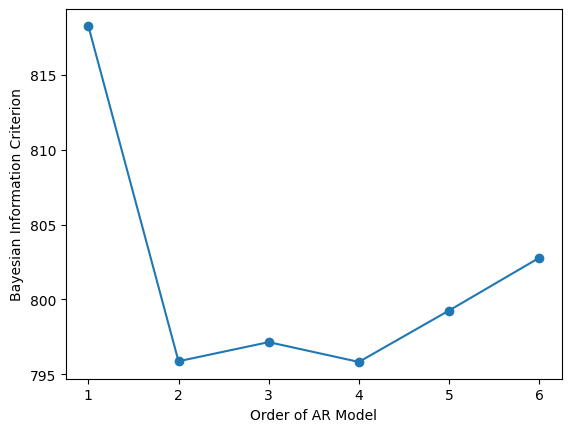

In [209]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(df.Y4.diff(), order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [210]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y4.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.321415
p-value:0.000000


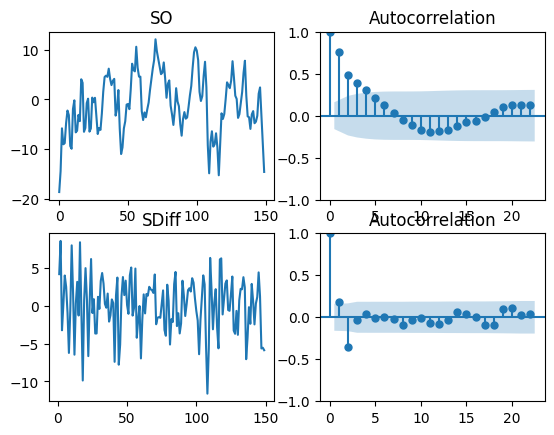

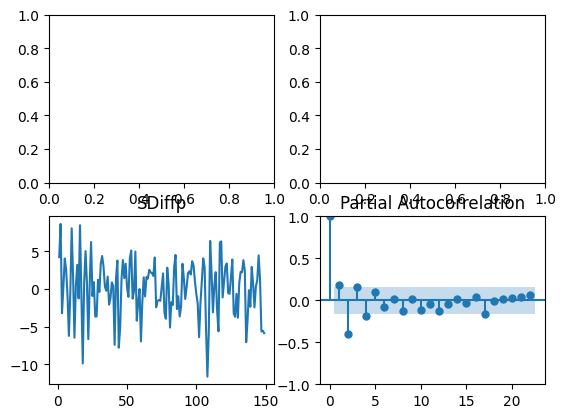

In [235]:
#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y4); axes[0,0].set_title('SO')
plot_acf(df.Y4, ax=axes[0,1])
axes[1,0].plot(df.Y4.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y4.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y4.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y4.diff().dropna(), ax=axes[1,1])
plt.show()

In [212]:
#nuevo df
result=adfuller(df.Y4.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -7.321415
p-value:0.000000


In [236]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y4, order=(0, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y4   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -404.042
Date:                Mon, 20 Nov 2023   AIC                            810.085
Time:                        22:13:19   BIC                            813.089
Sample:                             0   HQIC                           811.305
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        13.2701      1.463      9.069      0.000      10.402      16.138
Ljung-Box (L1) (Q):                   4.77   Jarque-Bera (JB):                 4.14
Prob(Q):                              0.03   Pr

In [237]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

,lb_stat,lb_pvalue
10,25.23626,0.004915


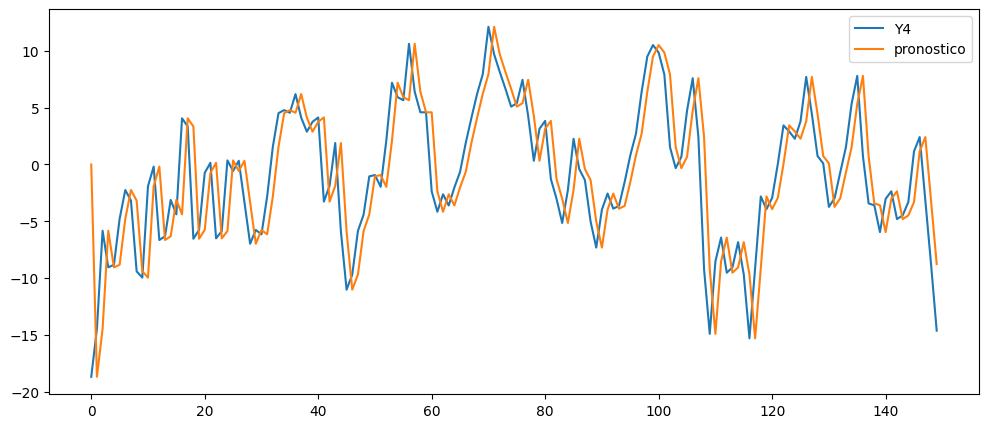

In [238]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y4', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y5 - exam

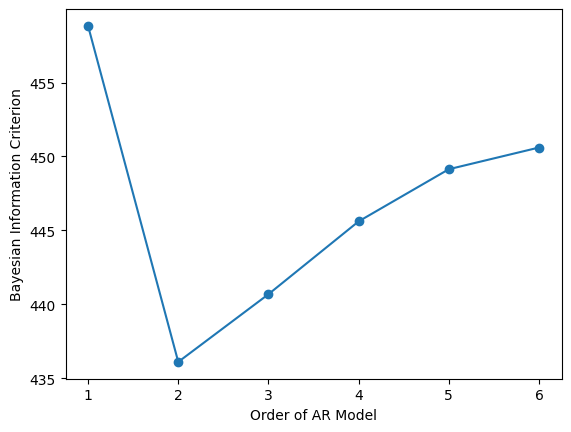

In [241]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(df.Y5, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

In [242]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y5.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -5.861957
p-value:0.000000


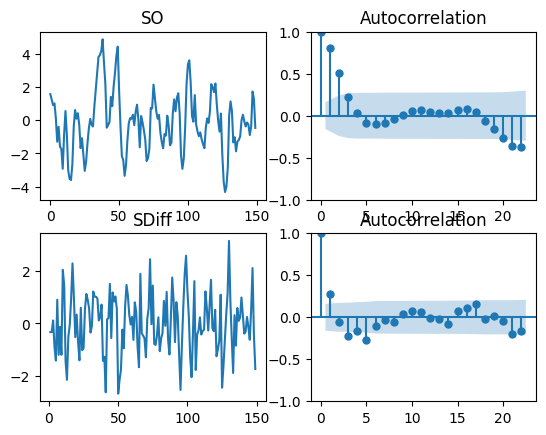

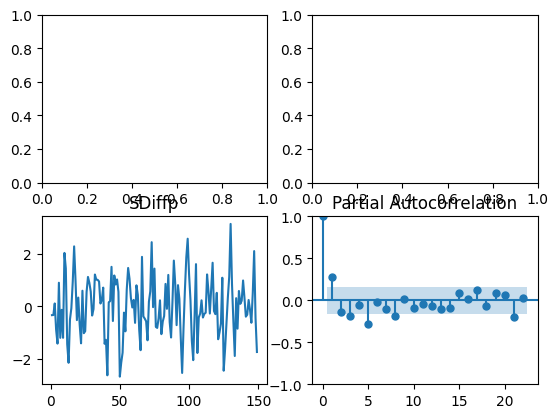

In [243]:

#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y5); axes[0,0].set_title('SO')
plot_acf(df.Y5, ax=axes[0,1])
axes[1,0].plot(df.Y5.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y5.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y5.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y5.diff().dropna(), ax=axes[1,1])
plt.show()

In [244]:
#nuevo df
result=adfuller(df.Y5.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

ADF Statistic: -6.953592
p-value:0.000000


In [245]:
#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y5, order=(0, 1, 1))
resultados = modelo_y.fit()
print (resultados.summary())

                               SARIMAX Results                                
Dep. Variable:                     Y5   No. Observations:                  150
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -221.394
Date:                Mon, 20 Nov 2023   AIC                            446.788
Time:                        22:14:12   BIC                            452.796
Sample:                             0   HQIC                           449.229
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.2836      0.081      3.518      0.000       0.126       0.442
sigma2         1.1426      0.135      8.453      0.000       0.878       1.407
Ljung-Box (L1) (Q):                   0.05   Jarque-

In [246]:
#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,19.961688,0.029617


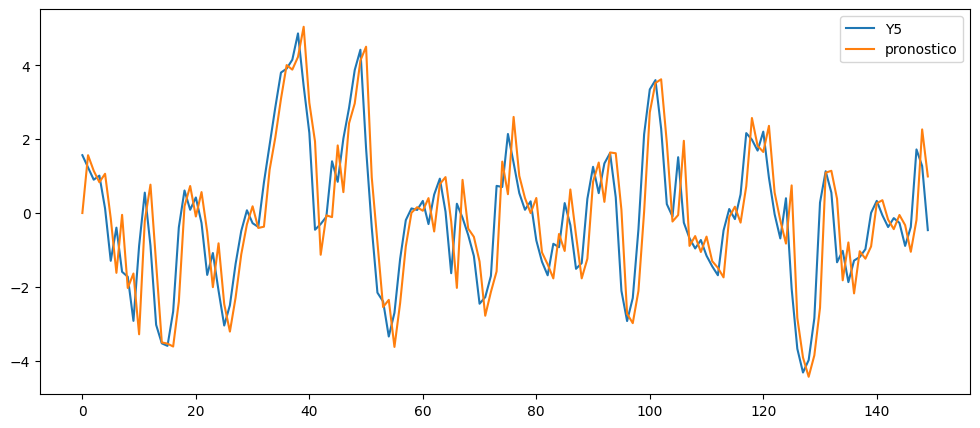

In [247]:
#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y5', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y6

ADF Statistic: -0.878888
p-value:0.794845


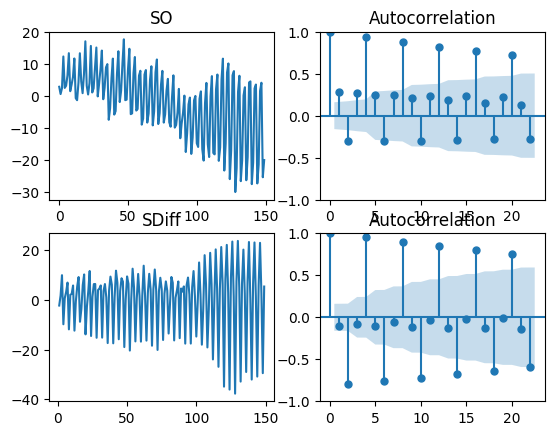

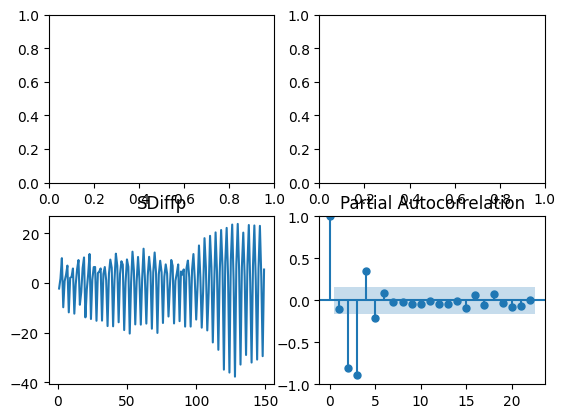

ADF Statistic: -6.865375
p-value:0.000000
                               SARIMAX Results                                
Dep. Variable:                     Y6   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -595.439
Date:                Mon, 20 Nov 2023   AIC                           1194.879
Time:                        22:04:33   BIC                           1200.887
Sample:                             0   HQIC                          1197.320
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1001      0.173     -0.578      0.563      -0.440       0.239
sigma2       173.2112     18.720      9.253      0.000     136.520     209.902
Ljung-Box 

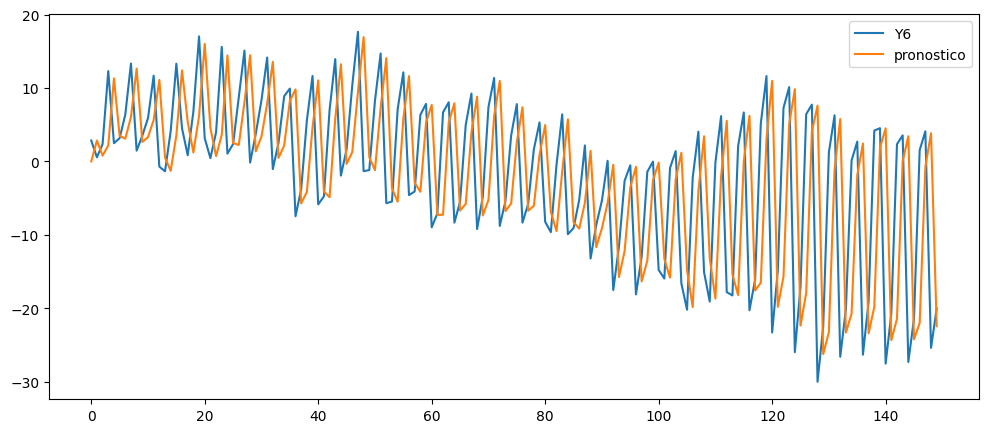

In [223]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y6.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y6); axes[0,0].set_title('SO')
plot_acf(df.Y6, ax=axes[0,1])
axes[1,0].plot(df.Y6.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y6.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y6.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y6.diff().dropna(), ax=axes[1,1])
plt.show()

#nuevo df
result=adfuller(df.Y6.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y6, order=(1, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y6', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y7

ADF Statistic: -0.489960
p-value:0.893961


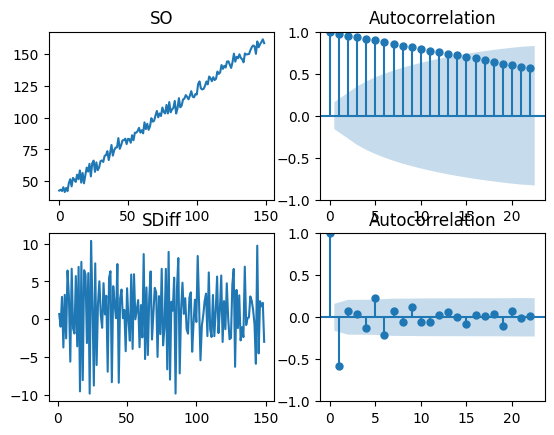

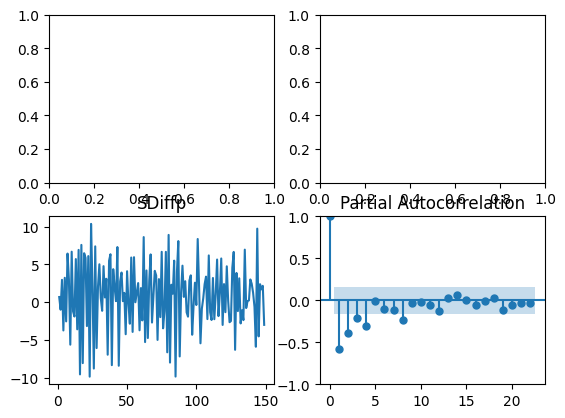

ADF Statistic: -7.617358
p-value:0.000000
                               SARIMAX Results                                
Dep. Variable:                     Y7   No. Observations:                  150
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -414.515
Date:                Mon, 20 Nov 2023   AIC                            833.031
Time:                        22:04:35   BIC                            839.039
Sample:                             0   HQIC                           835.472
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5300      0.072     -7.380      0.000      -0.671      -0.389
sigma2        15.2393      2.017      7.554      0.000      11.285      19.193
Ljung-Box 

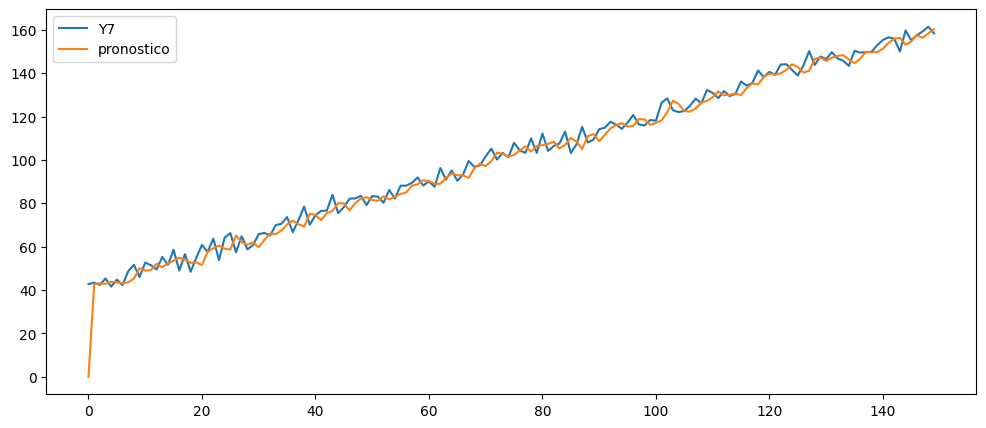

In [224]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y7.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y7); axes[0,0].set_title('SO')
plot_acf(df.Y7, ax=axes[0,1])
axes[1,0].plot(df.Y7.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y7.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y7.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y7.diff().dropna(), ax=axes[1,1])
plt.show()

#nuevo df
result=adfuller(df.Y7.diff().dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y7, order=(1, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y7', 'pronostico']].plot(figsize=(12,5))
plt.show()

# df.Y8 - exam

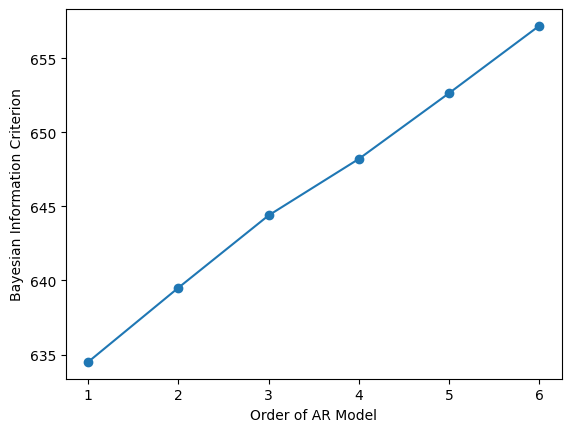

In [225]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the data to an AR(p) for p = 0,...,6 , and save the BIC
BIC = np.zeros(7)
for p in range(7):
    mod = ARIMA(df.Y8, order=(p,0,0))
    res = mod.fit()
# Save BIC for AR(p)
    BIC[p] = res.bic

# Plot the BIC as a function of p
plt.plot(range(1,7), BIC[1:7], marker='o')
plt.xlabel('Order of AR Model')
plt.ylabel('Bayesian Information Criterion')
plt.show()

ADF Statistic: -4.882765
p-value:0.000038


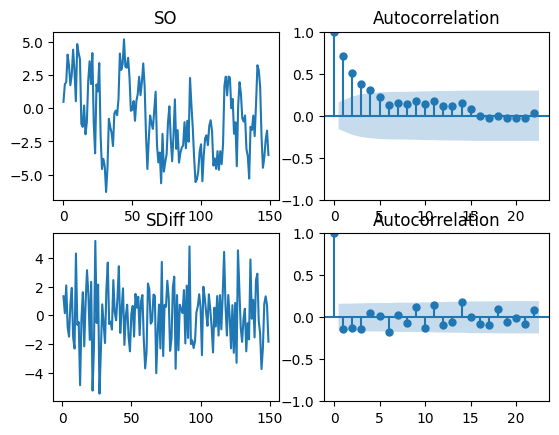

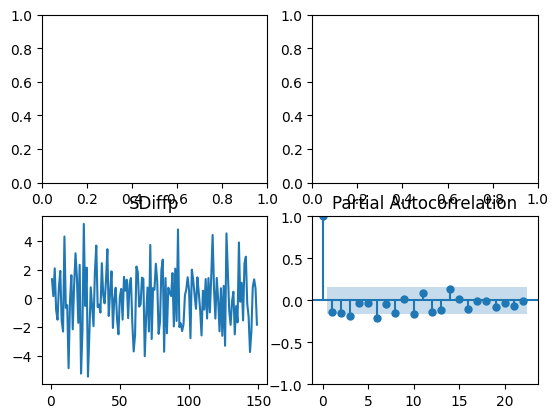

                               SARIMAX Results                                
Dep. Variable:                     Y8   No. Observations:                  150
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -318.898
Date:                Mon, 20 Nov 2023   AIC                            639.796
Time:                        22:14:52   BIC                            642.800
Sample:                             0   HQIC                           641.016
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         4.2319      0.504      8.389      0.000       3.243       5.221
Ljung-Box (L1) (Q):                   2.87   Jarque-Bera (JB):                 0.08
Prob(Q):                              0.09   Pr

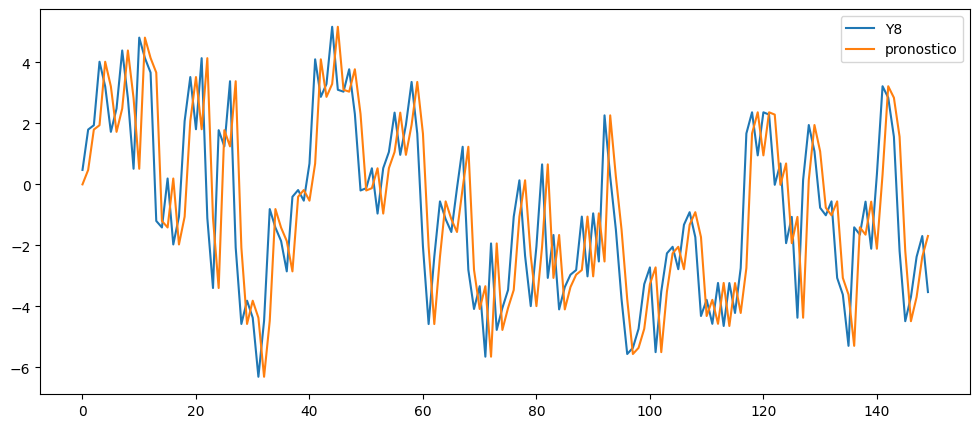

In [248]:
# df
from statsmodels.tsa.stattools import adfuller
from numpy import log
result=adfuller(df.Y8.dropna())
print ('ADF Statistic: %f' % result[0])
print('p-value:%f' % result[1])

#acf y pcf
fig, axes=plt.subplots(2,2, sharex=False)
axes[0,0].plot(df.Y8); axes[0,0].set_title('SO')
plot_acf(df.Y8, ax=axes[0,1])
axes[1,0].plot(df.Y8.diff()); axes[1,0].set_title('SDiff')
plot_acf(df.Y8.diff().dropna(), ax=axes[1,1])
plt.show()
fig, axes=plt.subplots(2,2, sharex=False)
axes[1,0].plot(df.Y8.diff()); axes[1,0].set_title('SDiffp')
plot_pacf(df.Y8.diff().dropna(), ax=axes[1,1])
plt.show()

#arima model
from statsmodels.tsa.arima.model import ARIMA
modelo_y = ARIMA(df.Y8, order=(0, 1, 0))
resultados = modelo_y.fit()
print (resultados.summary())

#ljungbox
#poner python y hacerlo en consola
import statsmodels.api as sm
sm.stats.acorr_ljungbox(resultados.resid, lags=[10], return_df=True)

#predicción
df['pronostico']=resultados.fittedvalues
plot=df[['Y8', 'pronostico']].plot(figsize=(12,5))
plt.show()